<a href="https://colab.research.google.com/github/andreaoa/Python_Analysis/blob/main/AnaliseDeDadosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados com Python**

#Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sn
plt.style.use('ggplot')

#Para tirar o limite de colunas e linhas exibidas
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#Problema instalando pacotes
#pip install --verbose --trusted-host=pypi.python.org --trusted-host=pypi.org --trusted-host=files.pythonhosted.org numpy

# Importar/criar arquivos

In [ ]:
#Para criar

'''
---Array Numpy
base = np.array([1,2,3,4,5,6,7,8,9])
base

---DataFrame
base = pd.DataFrame(data='dados', columns='nomes')
'''

#Para importar
arquivo = '/content/Online Retail.csv'
df = pd.read_csv(arquivo, delimiter = ';', decimal = ",")
#adicionar (skiprows=20) caso precise excluir as primeiras linhas do arquivo

#Importante fazer um cópia do DF antes de começar a fazer alteração



# Análise Exploratória dos Dados

In [ ]:
#Resumo das 5 primeiras linhas do DF

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#Resumo das 5 últimas linhas do DF

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [ ]:
#Descrição básica dos campos com número do DF

df.describe().T

#Para ter um resumo de todos os dados, mesmo os de texto
#df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
random_col,541909.0,49.517161,28.856606,0.00,25.00,50.00,75.00,99.0
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
rank_calc,541909.0,270955.000000,156290.289731,1.50,142137.50,263989.00,405326.00,541909.0


In [ ]:
#Informação das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Outra forma de saber o tipo de informação das colunas

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
random_col       int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
rank_calc      float64
dtype: object

In [ ]:
#Outra forma de saber o tipo de informação da base

df.shape

(541909, 8)

In [ ]:
 #Listar as colunas do df

 df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'random_col', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'rank_calc'],
      dtype='object')

In [ ]:
#Renomear uma coluna

df.rename(columns = {"Country": "Pais"}) #mudando nome da coluna Country para Pais

#Criar uma função para alterar o nome de varias colunas

'''
def fix_column_names(col_name):
  return col_name.replace('[itempararemover]', '')

df = df.rename(columns = fix_column_names)
'''


,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Pais,rank_calc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,95,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,319623.0
1,536365,71053,WHITE METAL LANTERN,49,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,74,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,326271.5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,38,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,41,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,86,12,09/12/2011 12:50,0.85,12680.0,France,98878.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,52,6,09/12/2011 12:50,2.10,12680.0,France,281343.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,42,4,09/12/2011 12:50,4.15,12680.0,France,416093.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,24,4,09/12/2011 12:50,4.15,12680.0,France,416093.0


In [ ]:
#Dropar colunas

#df.drop(columns = "Country")

In [ ]:
#Pegar colunas com variaveis categoricas
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)
print()
#Pegar colunas com números
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(num_cols)
print()

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

['random_col', 'Quantity', 'UnitPrice', 'CustomerID', 'rank_calc']



In [ ]:
#Saber se tem valores ausentes
#df.isnull().sum() #---para valores nulos
df.isna().sum()

#Para pegar a porcentagem de valores nulos
#(df.isnull().sum()/(len(df)))*100

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Saber se tem valores duplicados

#df.nunique() #---para valores unicos
#df.duplicated().sum()

df.duplicated() #
#df.duplicated(subset=['nome_coluna']) #Filtrar em uma coluna específica

#Filtrar linhas com valores duplicados
#df.loc[df.duplicated()]

#Selecionar o inverso dos duplicados
#df3 = df.loc[~df.duplicated(subset=['nome_coluna', 'nome_coluna2', '...'])] \ .reset_index(drop=True).copy() #usando ~ no inicio ele filtra o inverso


0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [ ]:
#Resumo por coluna
#Resultado convertido para um Data Frame para facilitar a visualização

pd.DataFrame(df['Country'].value_counts())

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


In [ ]:
#Pode usar dessa forma também
#df.Country.value_counts()

#Para aparecer em porcentagem
df.Country.value_counts(normalize=True)

#Para imprimir em gráfico
#df.Country.value_counts(normalize=True).plot(kind="bar")

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [ ]:
#Resumo de uma variável numérica
df.UnitPrice.describe()

#Imprimir Resumo de uma variável numérica
#df.UnitPrice.describe().hist(bins=60, figsize=(10,5))

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
#Quantidade de itens em cada coluna

df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
random_col     541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
rank_calc      541909
dtype: int64

In [ ]:
#Mostrar as linhas que tem valores vazios

df[df['CustomerID'].isna()] #filtrado pela coluna CustomerID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01/12/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01/12/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01/12/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01/12/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01/12/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09/12/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09/12/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09/12/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09/12/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
#Filtrar coluna

df[df['Country'] == 'Greece']

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_calc
69007,541932,22699,ROSES REGENCY TEACUP AND SAUCER,35,24,24/01/2011 11:39,2.55,14439.0,Greece,319623.0
69008,541932,22697,GREEN REGENCY TEACUP AND SAUCER,35,24,24/01/2011 11:39,2.55,14439.0,Greece,319623.0
69009,541932,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,69,24,24/01/2011 11:39,2.95,14439.0,Greece,343959.5
69010,541932,22720,SET OF 3 CAKE TINS PANTRY DESIGN,17,24,24/01/2011 11:39,4.25,14439.0,Greece,425222.5
69011,541932,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,85,16,24/01/2011 11:39,8.49,14439.0,Greece,503296.0
...,...,...,...,...,...,...,...,...,...,...
529771,580752,23389,SPACEBOY MINI BACKPACK,11,4,06/12/2011 09:56,4.15,12478.0,Greece,416093.0
529772,580752,23390,DOLLY GIRL MINI BACKPACK,48,4,06/12/2011 09:56,4.15,12478.0,Greece,416093.0
529773,580752,23108,SET OF 10 LED DOLLY LIGHTS,32,2,06/12/2011 09:56,6.25,12478.0,Greece,473923.0
529774,580752,23254,CHILDRENS CUTLERY DOLLY GIRL,20,4,06/12/2011 09:56,4.15,12478.0,Greece,416093.0


In [ ]:
#Excluir colunas

#1° Método
#df.drop() -- ver qual é o método correto

#2° Método
#listar manualmente as colunas que você quer

#df1 = df[['Coluna 1', 'Coluna 2', 'Coluna 3', 'Coluna...']]

#importante usar copy() ao final da lista
#df1 = df[['Coluna 1', 'Coluna 2', 'Coluna 3', 'Coluna...']].copy()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

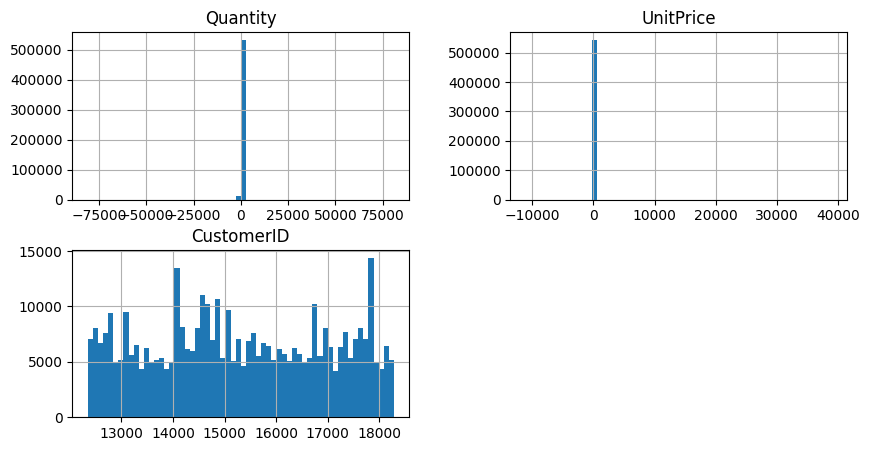

In [ ]:
#Histograma básico dos dados --- apenas colunas de dados

df.hist(bins=60, figsize=(10,5))

In [ ]:
#Filtragem básica de uma coluna para check

quantidadeGrande = df[df['Quantity']>100]

df[df['Quantity']>100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,01/12/2010 09:37,0.42,14688.0,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,01/12/2010 09:58,3.82,16029.0,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,01/12/2010 09:58,3.37,16029.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,01/12/2010 09:58,3.37,16029.0,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,01/12/2010 09:58,1.45,16029.0,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,09/12/2011 09:44,3.39,15694.0,United Kingdom
541286,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,09/12/2011 10:23,2.46,NaN,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,09/12/2011 10:46,0.19,12985.0,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,09/12/2011 11:50,3.26,18102.0,United Kingdom


<Axes: xlabel='UnitPrice', ylabel='Quantity'>

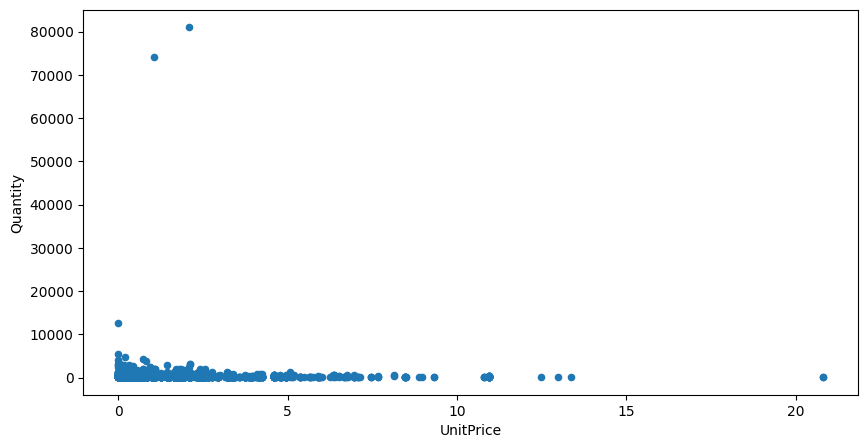

In [ ]:
#Gráfico

quantidadeGrande[['Quantity', 'UnitPrice']].plot(kind='scatter', x='UnitPrice', y='Quantity', figsize=(10,5))

In [ ]:
valoresVazios = df[['Description', 'Country']]
valoresVazios.apply(pd.Series.value_counts)

,Description,Country
4 PURPLE FLOCK DINNER CANDLES,41.0,NaN
50'S CHRISTMAS GIFT BAG LARGE,130.0,NaN
DOLLY GIRL BEAKER,181.0,NaN
I LOVE LONDON MINI BACKPACK,88.0,NaN
I LOVE LONDON MINI RUCKSACK,1.0,NaN
...,...,...
wrongly marked carton 22804,1.0,NaN
wrongly marked. 23343 in box,1.0,NaN
wrongly sold (22719) barcode,1.0,NaN
wrongly sold as sets,1.0,NaN


In [ ]:
#Relação entre variaveis
#a = df[:]
#sns.pairplot(a)

In [ ]:
#Gráfico boxplot

#sns.catplot(x="Description", y="UnitPrice", data=df, kind="box", aspect=1.5)
#plt.title("Boxplot for Description vs UnitPrice")
#plt.show()

In [ ]:
x = [i for i in range(10) if i % 2 == 0]
print (x)

[0, 2, 4, 6, 8]


In [ ]:
#Fazer filtor nas colunas por algum valor específico
#Melhor forma de filtrar

df.query("Quantity > 200")

#df.query('nome_coluna' == "item_procurado"') #filtrar valores específicos de uma coluna

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,01/12/2010 09:58,1.45,16029.0,United Kingdom
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,01/12/2010 09:58,1.25,16029.0,United Kingdom
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,01/12/2010 10:19,0.10,17511.0,United Kingdom
730,536437,17021,NAMASTE SWAGAT INCENSE,600,01/12/2010 12:12,0.24,13694.0,United Kingdom
870,536477,21137,BLACK RECORD COVER FRAME,480,01/12/2010 12:27,3.39,16210.0,United Kingdom
...,...,...,...,...,...,...,...,...
540062,581457,82484,WOOD BLACK BOARD ANT WHITE FINISH,204,08/12/2011 18:43,4.80,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,08/12/2011 18:45,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,08/12/2011 18:46,0.72,17949.0,United Kingdom
540342,581476,16008,SMALL FOLDING SCISSOR(POINTED EDGE),240,09/12/2011 08:48,0.12,12433.0,Norway


In [ ]:
# Filtrar linhas
#df.iloc[:10, 5:10] #filtra pelo indice e de um valor até outro
df.loc[[3, 10, 14, 23], ['Description', 'Quantity', "UnitPrice"]] #aqui você escolhe as colunas e linhas específicas

,Description,Quantity,UnitPrice
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
10,POPPY'S PLAYHOUSE BEDROOM,6,2.10
14,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,4.25
23,YELLOW COAT RACK PARIS FASHION,3,4.95


In [ ]:
#Seleciona as colunas por um tipo específico de dado
df.select_dtypes(include='float') #selecionando as colunas com o tipo float

,UnitPrice,CustomerID
0,2.55,17850.0
1,3.39,17850.0
2,2.75,17850.0
3,3.39,17850.0
4,3.39,17850.0
...,...,...
541904,0.85,12680.0
541905,2.10,12680.0
541906,4.15,12680.0
541907,4.15,12680.0


In [ ]:
#Inserir uma coluna no data frame

random_col = np.random.randint(100, size=len(df)) #criando uma lista de valores aleatórios no tamanho do df
df.insert(3, 'random_col', random_col) #inserindo no df no index 3 com o nome random_col e passando o parametro da lista
df.head()

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,95,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,49,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,74,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,38,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,41,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#Pegando uma amostra dos valores

df.sample(5)
#df.sample(frac = 0.25) #para pegar uma fração do df

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
422491,573093,22554,PLASTERS IN TIN WOODLAND ANIMALS,4,2,27/10/2011 14:38,1.65,18283.0,United Kingdom
177201,552046,22692,DOORMAT WELCOME TO OUR HOME,48,2,06/05/2011 09:44,7.95,15235.0,United Kingdom
203083,554511,21207,SKULL AND CROSSBONES GARLAND,80,2,24/05/2011 15:52,1.63,NaN,United Kingdom
1982,C536548,22631,CIRCUS PARADE LUNCH BOX,56,-1,01/12/2010 14:33,1.95,12472.0,Germany
319703,564863,21164,HOME SWEET HOME METAL SIGN,11,6,31/08/2011 10:30,2.95,15491.0,United Kingdom


In [ ]:
#Filtrando dados

df.where(df['random_col'] > 90, 0) #valores que não são maiores que 50, foi colocado 0
#df['random_col'].where(df['random_col'] > 50) #é possível especificar uma ou várias colunas para exibir

#Outra forma de filtrar por uma determinada condição
'''
df[df['nome_colula']>df['nome_coluna'].mean()] #filtrando valores da coluna que são maiores do que a média
'''

#Filtro por celulas que contenham um nome especifico
'''
teste = df['nome_coluna'].str.contains('nome')
df2 = df[teste]
'''


,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,95,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,0,0,0,0,0,0,0.00,0.0,0
2,0,0,0,0,0,0,0.00,0.0,0
3,0,0,0,0,0,0,0.00,0.0,0
4,0,0,0,0,0,0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0.00,0.0,0
541905,0,0,0,0,0,0,0.00,0.0,0
541906,0,0,0,0,0,0,0.00,0.0,0
541907,0,0,0,0,0,0,0.00,0.0,0


In [ ]:
#Trazer os valores únicos de uma determinada coluna

df.Description.unique() #Usando a coluna de Descrição para trazer os valores únicos

#trazer a quantidade de valores únicos
#df.Quantity.nunique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
#Saber a quantidade de valores únicos de cada coluna
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
random_col       100
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
#Hankear uma coluna por um determinado valor

df['rank_calc'] = df["UnitPrice"].rank()
df.head()

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_calc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,95,6,01/12/2010 08:26,2.55,17850.0,United Kingdom,319623.0
1,536365,71053,WHITE METAL LANTERN,49,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,74,8,01/12/2010 08:26,2.75,17850.0,United Kingdom,326271.5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,38,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,41,6,01/12/2010 08:26,3.39,17850.0,United Kingdom,375024.0


In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
#Filtrar valores que contenham esses abaixo

country = ['Finland', 'Bahrain', 'Greece'] #filtrando apenas esses paises
df[df.Country.isin(country)] #filtrando a coluna contry com os valores da lista acima

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_calc
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,70,72,16/12/2010 19:09,0.55,12348.0,Finland,49564.0
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,31,72,16/12/2010 19:09,0.55,12348.0,Finland,49564.0
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,8,24,16/12/2010 19:09,0.55,12348.0,Finland,49564.0
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,40,120,16/12/2010 19:09,0.42,12348.0,Finland,32822.0
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,88,24,16/12/2010 19:09,0.55,12348.0,Finland,49564.0
...,...,...,...,...,...,...,...,...,...,...
529772,580752,23390,DOLLY GIRL MINI BACKPACK,48,4,06/12/2011 09:56,4.15,12478.0,Greece,416093.0
529773,580752,23108,SET OF 10 LED DOLLY LIGHTS,32,2,06/12/2011 09:56,6.25,12478.0,Greece,473923.0
529774,580752,23254,CHILDRENS CUTLERY DOLLY GIRL,20,4,06/12/2011 09:56,4.15,12478.0,Greece,416093.0
529775,580752,22899,CHILDREN'S APRON DOLLY GIRL,3,6,06/12/2011 09:56,2.10,12478.0,Greece,281343.0


In [ ]:
#Filtrar

In [ ]:
#Modificar um determinado valor de uma coluna

#a = df.Country.replace('Brazil', 'Greece', inplace = True)
#df.Country.unique()

#Podemos usar um dicionario para alterar vários valores
#df.replace({1.0: 1.1,  4.0: 4.1, 3.0: 3.1})

In [ ]:
#Preencher os vazios

#df['pace'].fillna(0, inplace=True) #preenche vazios com zero, posso passar um parametro também(moda, média etc...)
#df['pace'].fillna(df['pace'].mean(), inplace = True)


In [ ]:
#Dinamica

#df.groupby('Country')['Quantity'].sum() #soma

#df.groupby('Country')['Quantity'].agg([np.sum, np.mean, np.median])
df.groupby(['Country']).mean()

<ipython-input-102-d92737756404>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Country']).mean()


,random_col,Quantity,UnitPrice,CustomerID,rank_calc
Country,,,,,
Australia,47.240667,66.444003,3.220612,12464.656076,255910.145751
Austria,50.256858,12.037406,4.243192,12521.451372,269302.366584
Bahrain,51.052632,13.684211,4.556316,12354.529412,355926.157895
Belgium,48.639439,11.189947,3.644335,12430.298695,271336.930401
Canada,49.834437,18.298013,6.030331,17321.079470,218663.605960
Channel Islands,49.340369,12.505277,4.932124,14888.151715,304943.135224
Cyprus,50.228296,10.155949,6.302363,12404.951768,311181.453376
Czech Republic,48.366667,19.733333,2.938333,12781.000000,195245.250000
Denmark,48.678663,21.048843,3.256941,12536.591260,256134.496144


In [ ]:
#Tabela de frequencia de dois valores

'''
pd.crosstab(df['league_rank'], df['international_reputation'],
            margins = True,
            margins_name="Total",
            normalize = True)

'''

In [ ]:
#Classifica os valores em bins

pd.qcut(df['Quantity'], q = 6).value_counts() #aqui tenta colocar os valores em 6 classes

#Outra forma
#pd.cut(df['Quantity'], bins = 3).value_counts()

(-80995.001, 1.0]    158851
(6.0, 12.0]          102387
(3.0, 6.0]            91109
(1.0, 2.0]            81829
(12.0, 80995.0]       70612
(2.0, 3.0]            37121
Name: Quantity, dtype: int64

In [ ]:
#Da os maiores valores na coluna quantidade
df.nlargest(5, "Quantity")

#Para os menores
#df.nsmallest(5, "Quantity")

,InvoiceNo,StockCode,Description,random_col,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank_calc
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",58,80995,09/12/2011 09:15,2.08,16446.0,United Kingdom,263989.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,45,74215,18/01/2011 10:01,1.04,12346.0,United Kingdom,114964.5
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,51,12540,25/11/2011 15:57,0.00,13256.0,United Kingdom,1260.0
74614,542504,37413,NaN,14,5568,28/01/2011 12:03,0.00,NaN,United Kingdom,1260.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,80,4800,27/10/2011 12:26,0.21,12901.0,United Kingdom,6144.5


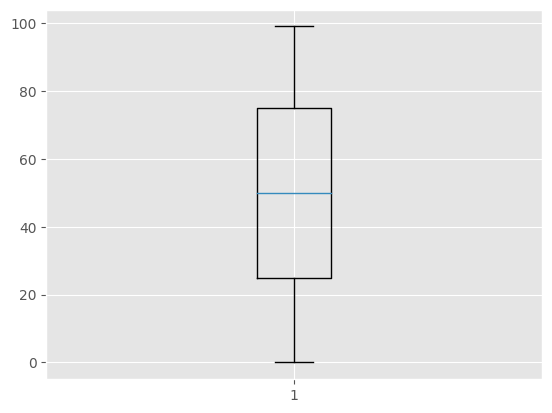

In [ ]:
#Gerar um gráfico boxplot, mostra a distribuição dos dados

y = list(df.random_col)
plt.boxplot(y)
plt.show()

In [ ]:
df.random_col.describe()

count    541909.000000
mean         49.517161
std          28.856606
min           0.000000
25%          25.000000
50%          50.000000
75%          75.000000
max          99.000000
Name: random_col, dtype: float64

In [ ]:
#Remover linhas vazias
#primeira opção
#df.dropna()

#segunda opção, através de mascara
'''
vazios = df['coluna_x'].notnull()
df = df[vazios]

df = df[df['coluna_x'].notnull()] #outra opção
'''


"\nvazios = df['coluna_x'].notnull()\ndf = df[vazios]\n\ndf = df[df['coluna_x'].notnull()] #outra opção\n"

In [ ]:
#Converter uma coluna de float para STR

'''
def float_to_string(f):
  return str(int(f))

df['nome_da_coluna'].map(float_to_string)
'''

#Converter de str para datetime
'''
data_como_str = df['nome_da_coluna'].map(float_to_string)

#Converter para Datetime
df['nome_da_coluna'] = pd.to_datetime(data_como_str)
df['nome_da_coluna']

#STR para numérico
pd.to_numeric(df['nome_coluna']) #apenas visualiza

#Para fazer alteração
df['nome_coluna'] = pd.to_numeric(df['nome_coluna'])
'''

#Converter para Data
#df['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

#Converter para STR
#df['CustomerID'] = df['CustomerID'].astype('str')

"\ndata_como_str = df['nome_da_coluna'].map(float_to_string)\n\n#Converter para Datetime\ndf['nome_da_coluna'] = pd.to_datetime(data_como_str)\ndf['nome_da_coluna']\n\n#Outra forma\npd.to_datetime(df['coluna_1'])\n"

In [ ]:
#Gráfico de correlação

#df[['nome1', 'nome2', 'nome3']].dropna().corr()

In [ ]:
#Converter uma variável

#Para data
#df['nome_coluna'] = pdf.to_datetime(df['nome_coluna'])

#bd['DTEMISSAO'] = bd[['EMISSAO']].apply(pd.to_datetime)

#bd['DTEMISSAO'] = pd.to_datetime(bd['EMISSAO'], format='%d/%m/%Y')
#bd['DTPRAZO'] = pd.to_datetime(bd['PRAZO'], format='%d/%m/%Y')